# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [3]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [4]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

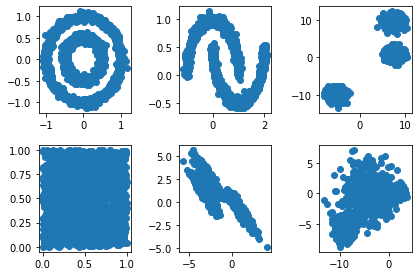

In [5]:
fig, axes = plt.subplots(2,3)
fig.tight_layout()
axes[0,0].scatter(A[:,0],A[:,1])
axes[0,1].scatter(B[:,0],B[:,1])
axes[0,2].scatter(C[:,0],C[:,1])
axes[1,0].scatter(D[:,0],D[:,1])
axes[1,1].scatter(E[:,0],E[:,1])
axes[1,2].scatter(F[:,0],F[:,1])

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

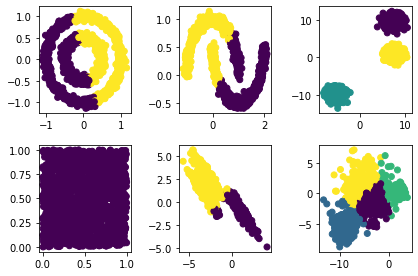

In [6]:
A_K = cluster.KMeans(n_clusters = 2, init='k-means++')
B_K = cluster.KMeans(n_clusters = 2, init='k-means++')
C_K = cluster.KMeans(n_clusters = 3, init='k-means++')
D_K = cluster.KMeans(n_clusters = 1, init='k-means++')
E_K = cluster.KMeans(n_clusters = 2, init='k-means++')
F_K = cluster.KMeans(n_clusters = 4, init='k-means++')

A_pred = A_K.fit_predict(A)
B_pred = B_K.fit_predict(B)
C_pred = C_K.fit_predict(C)
D_pred = D_K.fit_predict(D)
E_pred = E_K.fit_predict(E)
F_pred = F_K.fit_predict(F)

fig, axes = plt.subplots(2,3)
fig.tight_layout()
axes[0,0].scatter(A[:,0],A[:,1], c=A_pred)
axes[0,1].scatter(B[:,0],B[:,1], c=B_pred)
axes[0,2].scatter(C[:,0],C[:,1], c=C_pred)
axes[1,0].scatter(D[:,0],D[:,1], c=D_pred)
axes[1,1].scatter(E[:,0],E[:,1], c=E_pred)
axes[1,2].scatter(F[:,0],F[:,1], c=F_pred)

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


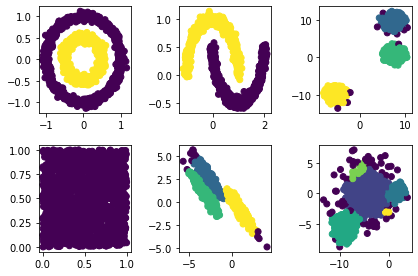

In [7]:
A_DB = cluster.DBSCAN(eps = 0.15)
B_DB = cluster.DBSCAN(eps = 0.15)
C_DB = cluster.DBSCAN(eps = 0.8)
D_DB = cluster.DBSCAN()
E_DB = cluster.DBSCAN(eps = 0.35)
F_DB = cluster.DBSCAN(eps = 0.65)

A_pred = A_DB.fit_predict(A)
B_pred = B_DB.fit_predict(B)
C_pred = C_DB.fit_predict(C)
D_pred = D_DB.fit_predict(D)
E_pred = E_DB.fit_predict(E)
F_pred = F_DB.fit_predict(F)

fig, axes = plt.subplots(2,3)
fig.tight_layout()
axes[0,0].scatter(A[:,0],A[:,1], c=A_pred)
axes[0,1].scatter(B[:,0],B[:,1], c=B_pred)
axes[0,2].scatter(C[:,0],C[:,1], c=C_pred)
axes[1,0].scatter(D[:,0],D[:,1], c=D_pred)
axes[1,1].scatter(E[:,0],E[:,1], c=E_pred)
axes[1,2].scatter(F[:,0],F[:,1], c=F_pred)